In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [112]:
#Load the experiment data
def get_data():
    data=load_svmlight_file("australian_scale")
    return data[0],data[1]
x_data,y_data=get_data();

In [113]:
#divide dataset
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3)

In [114]:
#choose loss function and derivation
def hingelossFunction(x,y,w,b,c):
    cost=0
    for i in range(x.shape[0]):
        cost+=np.max([0,1-y[i]*(x[i]*w+b)])
    cost=np.sum(np.square(w))+c*cost/(2*x.shape[0])
    return cost
                     
def derivation(x,y,w,b,c):
    wd=np.zeros(x.shape[1])
    bd=0
    for i in range(x.shape[0]):
        if((1-y[i]*(x[i]*w+b)))>0 :
            for k in range(x.shape[1]) :
                wd[k]+=(-1)*y[i]*x[i,k]
            bd+=(-1)*y[i]
    wd=(wd*c+w)/x.shape[0]
    bd=(bd*c)/x.shape[0]
    return wd,bd

In [115]:
def linearClassify(x_train,x_test,y_train,y_test,delta,num_iters):
    w=np.zeros(x_data.shape[1])
    b=0
    c=10
    trainCost=np.zeros(num_iters)
    validateCost=np.zeros(num_iters)
    for i in range(num_iters):
        trainCost[i]=hingelossFunction(x_train,y_train,w,b,c)
        validateCost[i]=hingelossFunction(x_test,y_test,w,b,c)
        Gw,Gb=derivation(x_train,y_train,w,b,c);
        Dw=-Gw
        Db=-Gb
        w=w+delta*Dw
        b=b+delta*Db
    return trainCost,validateCost

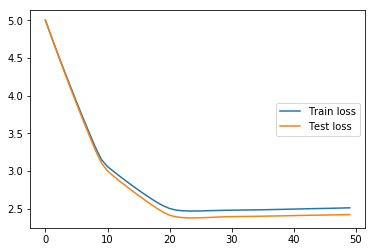

In [116]:
num_iters=50;
delta=0.005
train_cost,validate_cost=linearClassify(x_train,x_test,y_train,y_test,delta,num_iters)
plt.figure(1)
x=np.arange(0,num_iters,1)
plt.plot(x,train_cost,label = "Train loss")
plt.plot(x,validate_cost,label = "Test loss")
plt.legend(loc='right')
plt.show()